In [1]:
%pip install scikit-fuzzy
%pip install scipy
%pip install networkx
%pip install matplotlib

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Variaveis de Entrada (Antecedent)
massa = ctrl.Antecedent(np.arange(0, 51, 1), 'Imc')
atividadeFisica = ctrl.Antecedent(np.arange(0, 11, 1), 'atividadeFisica')


#Variaveis de saide (Consequent)
obesidade = ctrl.Consequent(np.arange(0, 101, 1), 'obesidade')



c:\Users\adoro\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


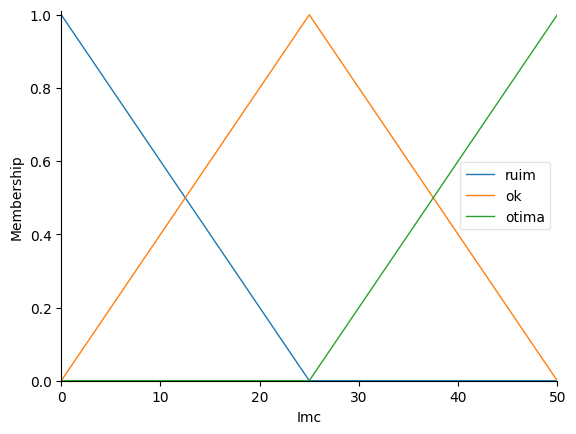

In [3]:
# automf -> Atribuição de categorias automaticamente
massa.automf(names=['ruim', 'ok', 'otima'])
massa.view()

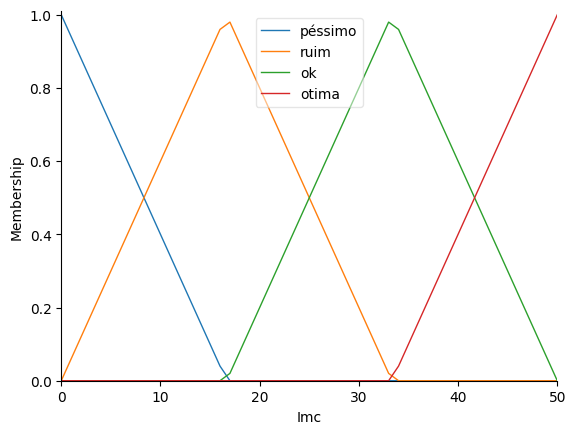

In [4]:
# automf -> Atribuição de categorias automaticamente
massa.automf (names=['péssimo', 'ruim', 'ok', 'otima' ], )
massa.view()

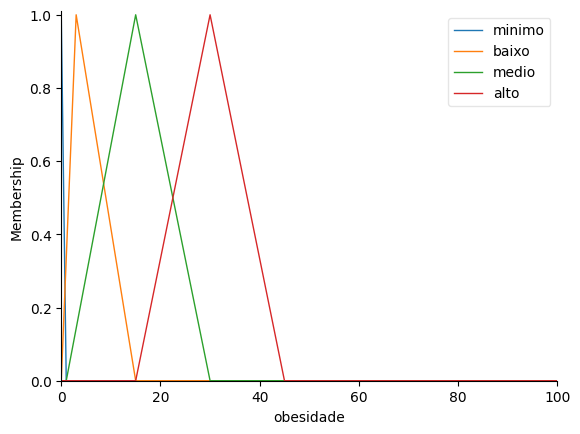

In [5]:
# sem o automf
obesidade['minimo' ] = fuzz.trimf(obesidade.universe, [-1,0,1])
obesidade['baixo' ] = fuzz.trimf(obesidade.universe, [0,3,15])
obesidade['medio' ] = fuzz.trimf(obesidade.universe, [1,15,30])
obesidade['alto'] = fuzz.trimf(obesidade.universe, [15,30,45])
obesidade.view()

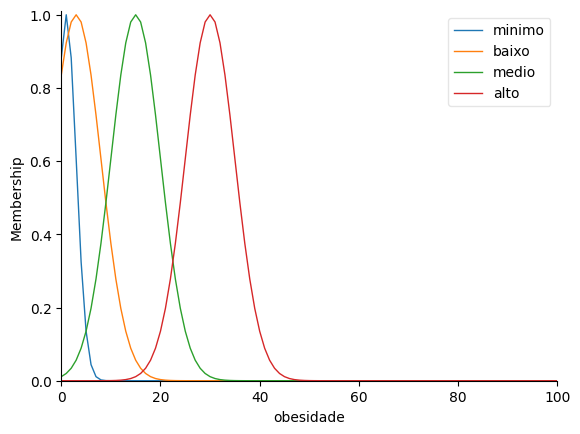

In [6]:
# sem o automf
obesidade['minimo' ] = fuzz.gaussmf(obesidade.universe, 1,2)
obesidade['baixo' ] = fuzz.gaussmf(obesidade.universe, 3, 5)
obesidade['medio' ] = fuzz.gaussmf(obesidade.universe, 15,5)
obesidade['alto' ] =fuzz.gaussmf(obesidade.universe, 30,5)
obesidade.view()

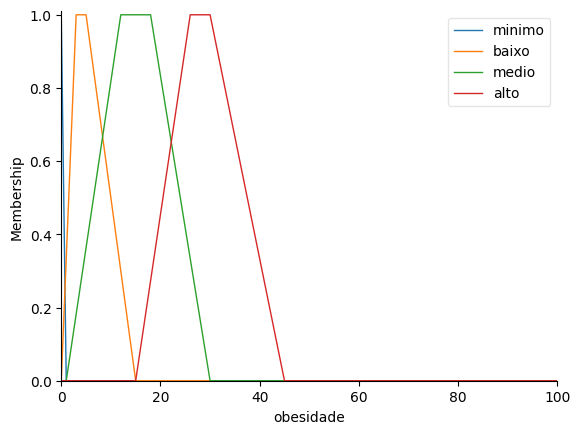

In [7]:
# sem o automf
obesidade['minimo' ] = fuzz.trapmf(obesidade.universe, [-1, 0, 0,1])
obesidade[ 'baixo' ] = fuzz.trapmf(obesidade.universe, [0,3,5,15])
obesidade['medio' ] = fuzz.trapmf(obesidade.universe, [1,12,18,30])
obesidade['alto'] = fuzz.trapmf(obesidade.universe, [15,26,30,45])
obesidade.view()

In [8]:
# Define membership functions for 'atividadeFisica'
atividadeFisica['péssimo'] = fuzz.trimf(atividadeFisica.universe, [0, 0, 2])
atividadeFisica['ruim'] = fuzz.trimf(atividadeFisica.universe, [0, 2, 5])
atividadeFisica['medio'] = fuzz.trimf(atividadeFisica.universe, [2, 5, 8])
atividadeFisica['bom'] = fuzz.trimf(atividadeFisica.universe, [5, 8, 10])
atividadeFisica['otimo'] = fuzz.trimf(atividadeFisica.universe, [8, 10, 10])

#Criando as regras
regra_1 = ctrl.Rule(massa['ruim'] & atividadeFisica['ruim'], obesidade['minimo'])
regra_2 = ctrl.Rule(massa['ruim'] | atividadeFisica['ruim'], obesidade['baixo'])
regra_3 = ctrl.Rule(atividadeFisica['medio'], obesidade['medio'])
regra_4 = ctrl.Rule(atividadeFisica['bom'] | massa['otima'], obesidade['alto'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4])


Risco de obesidade: 24.53%


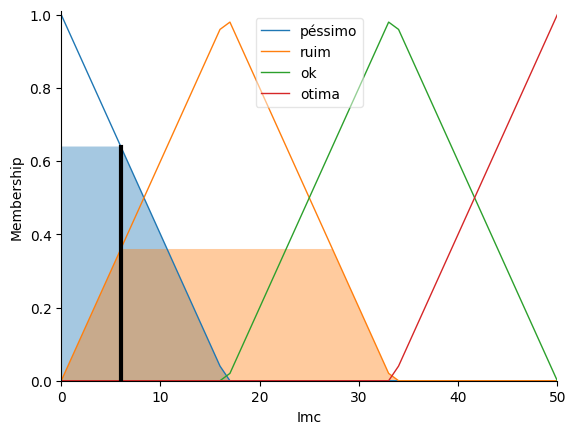

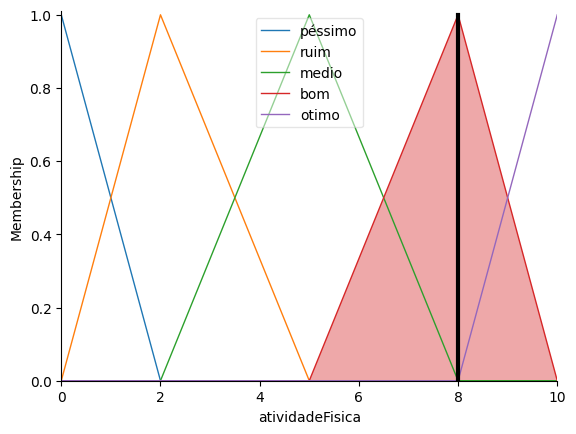

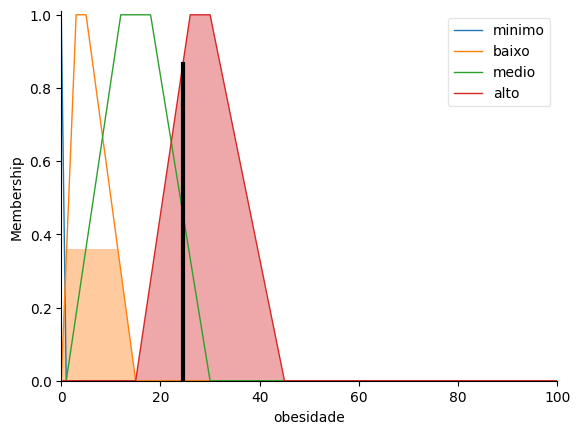

In [9]:
#Simulando
CalculoGorjeta = ctrl.ControlSystemSimulation(controlador)

CalculoGorjeta.input['Imc' ] = 6
CalculoGorjeta.input['atividadeFisica' ] = 8

# Crunch the numbers
CalculoGorjeta.compute()


valorPrint = CalculoGorjeta.output['obesidade']
print(f'Risco de obesidade: {valorPrint:.2f}%')

massa.view(sim=CalculoGorjeta)
atividadeFisica.view(sim=CalculoGorjeta)
obesidade.view(sim=CalculoGorjeta)